# Import Dependencies

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv(r"E:\100 DaysOfCode\Projects\dataset\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.drop(columns=['Id'],inplace=True)

In [50]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing

In [54]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [55]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Exploratory Data Analysis

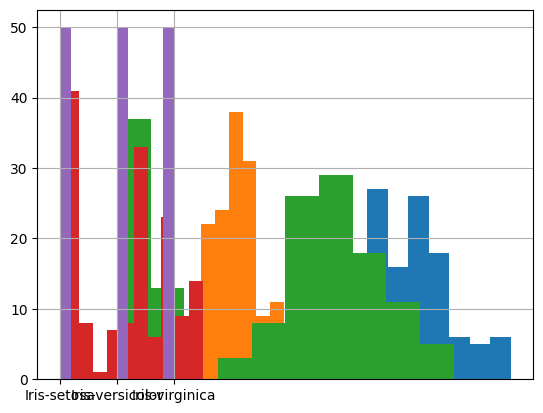

In [56]:
col=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']
for i in col:
    df[i].hist()

<Axes: >

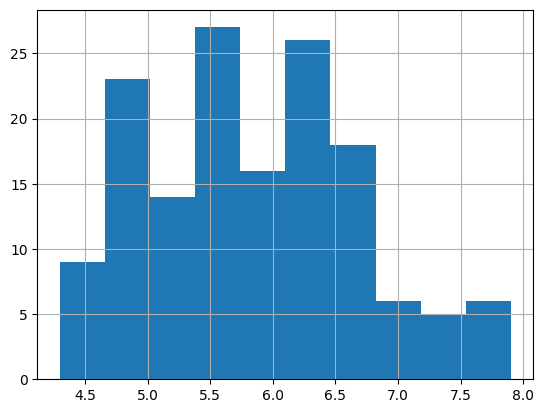

In [57]:
df['SepalLengthCm'].hist()

<Axes: >

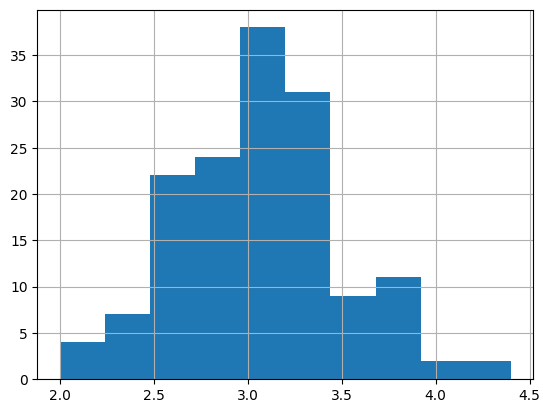

In [58]:
df['SepalWidthCm'].hist()

<Axes: >

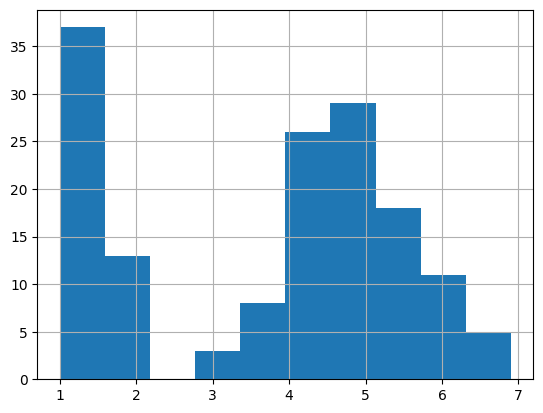

In [59]:
df['PetalLengthCm'].hist()

<Axes: >

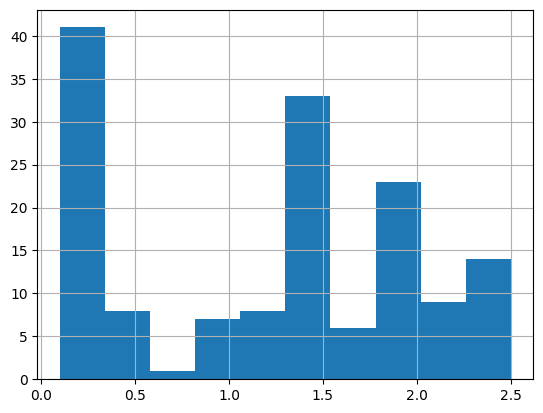

In [60]:
df['PetalWidthCm'].hist()

In [61]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


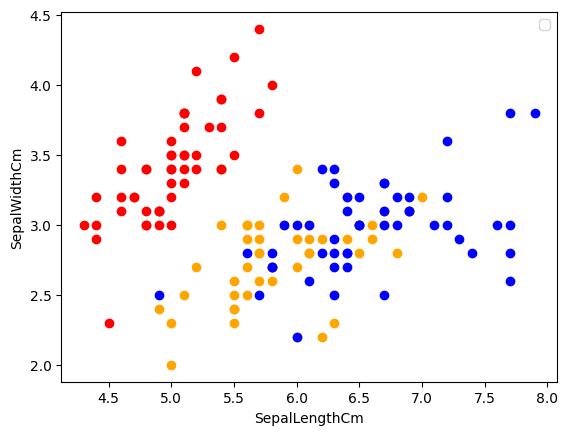

In [62]:
color=['red','orange','blue','yellow']
spec=['Iris-setosa','Iris-versicolor','Iris-virginica']

for  i in range(3):
    x=df[df['Species']==spec[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=color[i])
plt.xlabel('SepalLengthCm')  
plt.ylabel('SepalWidthCm')   
plt.legend() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


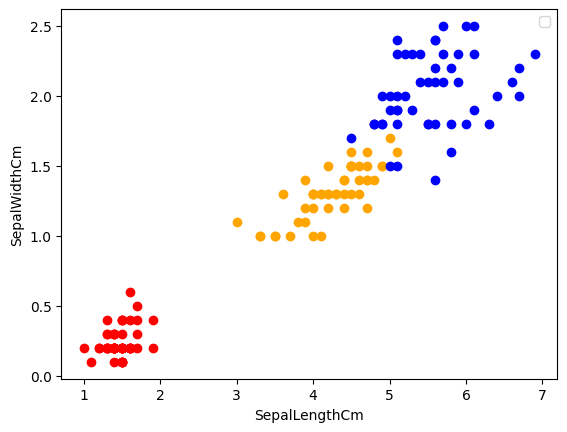

In [63]:
for  i in range(3):
    x=df[df['Species']==spec[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=color[i])
plt.xlabel('SepalLengthCm')  
plt.ylabel('SepalWidthCm')   
plt.legend() 


# correlation


In [64]:
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate correlation matrix
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

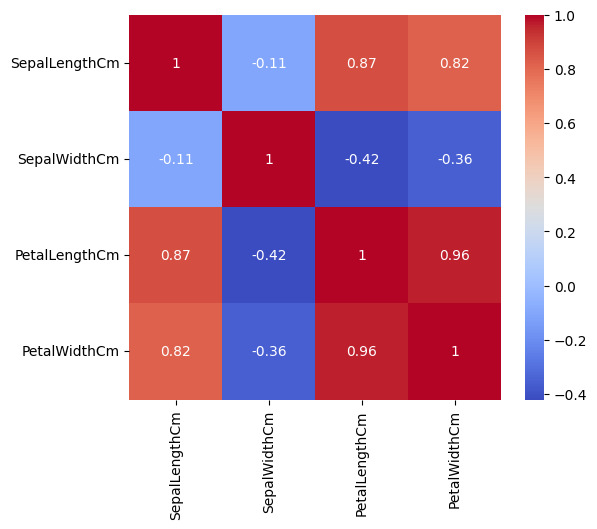

In [65]:
fig,ax=plt.subplots(figsize=(6,5))
sns.heatmap(correlation_matrix,annot=True,ax=ax,cmap='coolwarm')

# Label Encoder

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
df['Species']=le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [68]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

# Model Training

In [90]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [85]:
model.fit(x_train,y_train)

LogisticRegression()

In [86]:
#PRinit accurarcy
print("Accurarcy: ",model.score(x_test,y_test)*100)

Accurarcy:  100.0


In [91]:
# kNN

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [92]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [94]:
#PRinit accurarcy
print("Accurarcy: ",model.score(x_test,y_test)*100)

Accurarcy:  100.0
